In [6]:
import os
import numpy as np
from EnsemblePursuit.EnsemblePursuit import EnsemblePursuit
import matplotlib.pyplot as plt

In [2]:
fname='/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/kay_images.npz'
with np.load(fname) as dobj:
    dat = dict(**dobj)

In [3]:
print(dat['responses'].shape)

(1750, 8428)


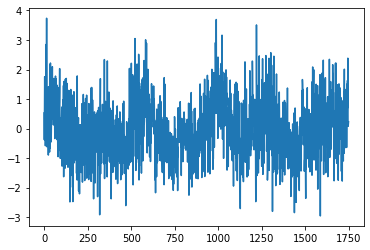

In [4]:
plt.plot(dat['responses'][:,0])

In [21]:
ep=EnsemblePursuit(lam=0.01,n_components=100,n_kmeans=100)
ep.fit(dat['responses'])

obtained 100 PCs in 2.5815 seconds
initialized 100 clusters with k-means in 1.3853 seconds
ensemble 0, time 0.34, nr neurons 302, EV 0.0040
ensemble 25, time 8.24, nr neurons 243, EV 0.0239
ensemble 50, time 15.19, nr neurons 126, EV 0.0392
ensemble 75, time 22.43, nr neurons 153, EV 0.0529
ensemble 99, time 28.72, nr neurons 55, EV 0.0638
average sparsity is 0.0211


In [11]:
V=ep.components_
print(V.shape)
U=ep.weights
print(U.shape)

(1750, 100)
(8428, 100)


In [25]:
ensemble=np.nonzero(U[:,99])[0]

In [18]:
print(ensemble)

[  10  519  526 ... 8372 8373 8400]


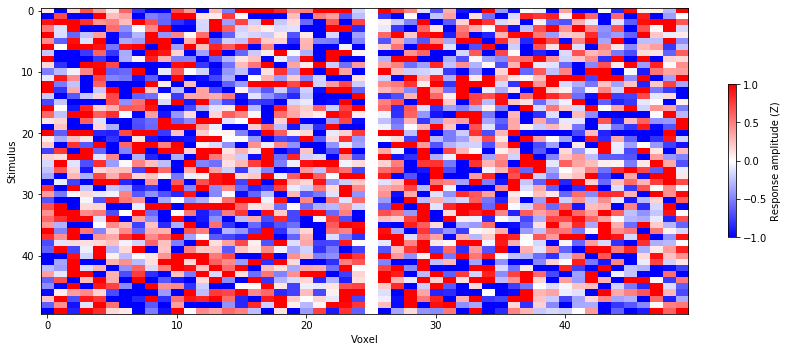

In [30]:
f, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Voxel", ylabel="Stimulus")
heatmap = ax.imshow(dat["responses"][:50,ensemble[:50]], aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
f.tight_layout()

In [28]:
dat['roi']

array([3, 3, 3, ..., 3, 3, 6])

In [35]:
names_dct={}

for j in range(0,dat['roi_names'].shape[0]):
    names_dct[j]=dat['roi_names'][j]

In [ ]:
print(dat[])

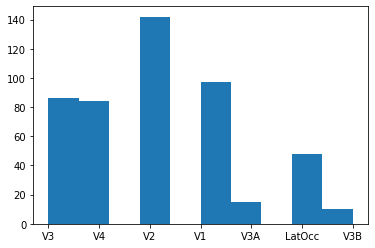

In [78]:
def which_regions(dat,U,ensemble_ind):
    reg_lst=[]
    names=list(dat['roi_names'])
    ensemble=np.nonzero(U[:,ensemble_ind])[0]
    dct={}
    for i in range(0,len(names)):
        dct[i]=names[i]
    for d in range(dat['roi'][ensemble].shape[0]):
        #print(d)
        #dat['roi'][ensemble]
        ind=dat['roi'][ensemble][d]
        indx=names.index(dct[ind])
        label=names[indx]
        reg_lst.append(label)
    #print(reg_lst)
    plt.hist(reg_lst)
which_regions(dat,U,19)

In [52]:
print(dat['roi_names'])

['Other' 'V1' 'V2' 'V3' 'V3A' 'V3B' 'V4' 'LatOcc']


In [55]:
which_regions(dat,U,50)

In [33]:
print(ens)

[ 0 57 91 96 22 23 45 24]


In [31]:
from sklearn.decomposition import PCA

pcs=PCA(n_components=100)



In [118]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [119]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128, 128)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])


In [120]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse'])

In [121]:
model.fit(dat['stimuli'], V[:,0], epochs=10)

Train on 1750 samples
Epoch 1/10
1750/1750 [==============================] - 1s 541us/sample - loss: 0.0689 - mse: 0.0689
Epoch 2/10
1750/1750 [==============================] - 1s 399us/sample - loss: 0.0185 - mse: 0.0185
Epoch 3/10
1750/1750 [==============================] - 1s 391us/sample - loss: 0.0072 - mse: 0.0072
Epoch 4/10
1750/1750 [==============================] - 1s 409us/sample - loss: 0.0035 - mse: 0.0035
Epoch 5/10
1750/1750 [==============================] - 1s 384us/sample - loss: 0.0015 - mse: 0.0015
Epoch 6/10
1750/1750 [==============================] - 1s 385us/sample - loss: 0.0011 - mse: 0.0011
Epoch 7/10
1750/1750 [==============================] - 1s 385us/sample - loss: 0.0011 - mse: 0.0011
Epoch 8/10
1750/1750 [==============================] - 1s 385us/sample - loss: 0.0013 - mse: 0.0013
Epoch 9/10
1750/1750 [==============================] - 1s 396us/sample - loss: 0.0010 - mse: 0.0010- ETA: 0s - loss: 0.0011 - 
Epoch 10/10
1750/1750 [===================

In [122]:
pred=model.predict(dat['stimuli'])

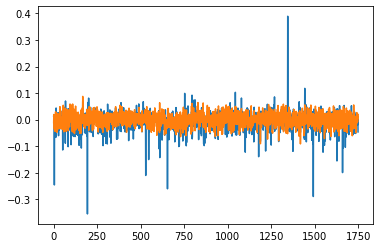

In [123]:
plt.plot(pred)
plt.plot(V[:,0])

In [124]:
print(np.corrcoef(pred.flatten(),V[:,0]))

[[1.         0.40003736]
 [0.40003736 1.        ]]


In [100]:
print(pred.shape)

(1750, 1)


In [87]:
print(V.shape)

(1750, 100)


In [83]:
print(dat['stimuli'].shape)

(1750, 128, 128)


In [157]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(12, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(12, (3, 3), activation='relu'))
model.add(Flatten())
model.add(keras.layers.Dense(128)) 
model.add(keras.layers.Dense(1))



In [158]:
#model.compile(loss="mse", optimizer="Adam")

In [152]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse'])

In [159]:
model.fit(dat['stimuli'].reshape(1750,128,128,1), V[:,0].reshape(1750,1), epochs=10)

Train on 1750 samples
Epoch 1/10
1750/1750 [==============================] - 12s 7ms/sample - loss: 0.0294
Epoch 2/10
1750/1750 [==============================] - 12s 7ms/sample - loss: 5.7436e-04
Epoch 3/10
1750/1750 [==============================] - 12s 7ms/sample - loss: 5.1373e-04
Epoch 4/10
1750/1750 [==============================] - 12s 7ms/sample - loss: 4.8063e-04
Epoch 5/10
1750/1750 [==============================] - 12s 7ms/sample - loss: 4.4935e-04
Epoch 6/10
1750/1750 [==============================] - 13s 7ms/sample - loss: 4.1016e-04
Epoch 7/10
1750/1750 [==============================] - 13s 7ms/sample - loss: 3.6586e-04
Epoch 8/10
1750/1750 [==============================] - 13s 7ms/sample - loss: 3.2758e-04
Epoch 9/10
1750/1750 [==============================] - 13s 7ms/sample - loss: 2.9624e-04
Epoch 10/10
1750/1750 [==============================] - 13s 7ms/sample - loss: 2.6283e-04


In [160]:
pred=model.predict(dat['stimuli'].reshape(1750,128,128,1))

In [161]:
print(np.corrcoef(pred.flatten(),V[:,0]))

[[1.         0.79726335]
 [0.79726335 1.        ]]


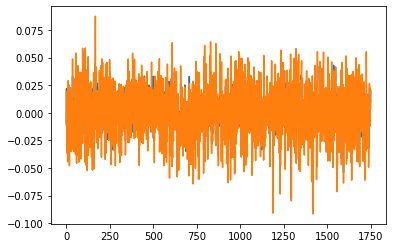

In [162]:
plt.plot(pred)
plt.plot(V[:,0])

In [168]:
print(dat['responses_test'].shape)

(120, 8428)


In [177]:
test=U[:,0]@dat['responses_test'].T

In [170]:
print(dat['stimuli_test'].shape)

(120, 128, 128)


In [174]:
pred_test=model.predict(dat['stimuli_test'].reshape(120,128,128,1))

In [178]:
print(np.corrcoef(pred_test.flatten(),test))

[[ 1.         -0.00517102]
 [-0.00517102  1.        ]]
